# Data Analysis - Programming
## Week 2
## Oefeningen

### Moeilijkheidsgraad

Omdat sommige van de onderstaande oefeningen wat lastiger zijn dan andere, is een indicatie van de moeilijkheidsgraad toegevoegd.

De volgende niveau's worden daarbij onderscheiden:
- <img src="images/stars_1.png" alt="1 star" style="display: inline" /> oefening van behandelde onderwerpen
- <img src="images/stars_2.png" alt="2 stars" style="display: inline" /> verdieping van behandelde onderwerpen
- <img src="images/stars_3.png" alt="3 stars" style="display: inline" /> uitdaging, stof tot nadenken

In [124]:
%pylab
%matplotlib inline
import scipy.stats as st
import pandas as pd

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### Opgave 1

<span>a.</span> Download de resultaten van het experiment met behulp van de code in slides van week 2 (laatste slide). Onderzoek de data door een numerieke samenvatting te maken van de numerieke kolommen. <img src="images/stars_1.png" alt="1 star" style="display: inline; margin-top: -5px" />

<span>b.</span> Onderzoek of er correlatie is tussen de drie numerieke kolommen (paarsgewijs). <img src="images/stars_1.png" alt="1 star" style="display: inline; margin-top: -5px" />

<span>c.</span> Voor de kolommen die (paarsgewijs) correlatie lijken te vertonen in opgave b, bereken de coëfficiënten van de regressielijn. <img src="images/stars_1.png" alt="1 star" style="display: inline; margin-top: -5px" />

<span>d.</span> Teken voor de in opgave c onderzochte kolomparen een scatterplot. Teken in de scatterplot tevens het gevonden regressielijnstuk. <img src="images/stars_2.png" alt="2 star" style="display: inline; margin-top: -5px" />

<span>e.</span> De kolom "geslacht" is tot dusver buiten beschouwing gebleven. Zou je deze kolom, of een variant erop, kunnen gebruiken om correlatie met één van de andere kolommen te bepalen? Beargumenteer waarom je denkt dat dat het geval is. Als je "ja" hebt beargumenteerd, probeer dan of je correlatie kunt onderzoeken en enkelvoudige, lineaire regressie toe kunt passen op de variabele "geslacht" en een andere variabele.<img src="images/stars_3.png" alt="3 star" style="display: inline; margin-top: -5px" />

Describing column 'leeftijd'
count    25.000000
mean     19.600000
std       2.217356
min      17.000000
25%      18.000000
50%      19.000000
75%      20.000000
max      26.000000
Name: leeftijd, dtype: float64


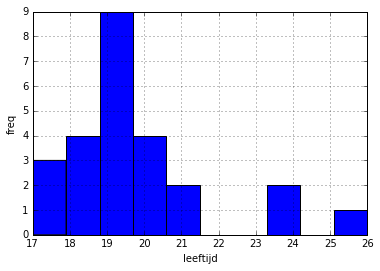

Describing column 'lengte'
count     25.000000
mean     173.560000
std       12.038411
min      145.000000
25%      165.000000
50%      172.000000
75%      182.000000
max      200.000000
Name: lengte, dtype: float64


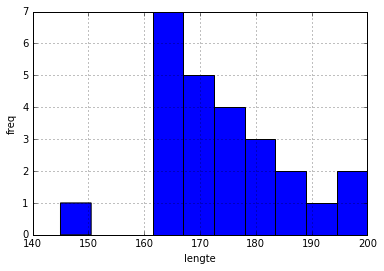

Describing column 'gewicht'
count    25.00000
mean     64.44000
std      10.23507
min      49.00000
25%      57.00000
50%      63.00000
75%      70.00000
max      90.00000
Name: gewicht, dtype: float64


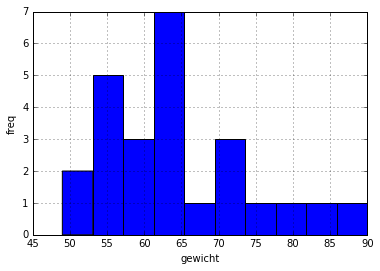

In [125]:
# opgave 1a
from io import StringIO
import requests

url = (
    "https://docs.google.com/spreadsheets/d/"
    "1L7ssCGoqnJSizt-J5OH0XryoBgN3fZ8md9RngnlyUNo/export?format=csv&gid=0"
)
r = requests.get(url)
data = r.content.decode("utf-8")
df = pd.read_csv(StringIO(data), index_col=0)
df.dropna(inplace=True)

for col in df.columns:
    if df[col].dtype == np.float_:
        print("Describing column '{}'".format(col))
        print(df[col].describe())
        df[col].hist()
        plt.xlabel(col)
        plt.ylabel("freq")
        plt.show()

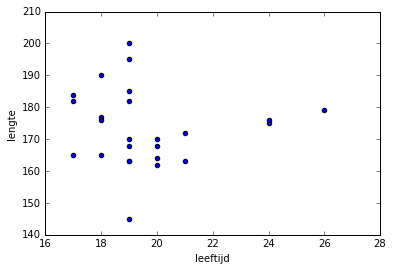

r = -0.0490 en P-value = 0.8160



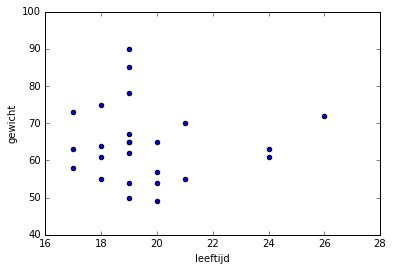

r = -0.0195 en P-value = 0.9264



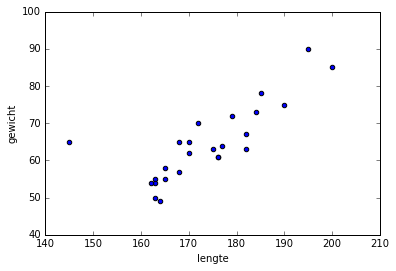

r = 0.7869 en P-value = 0.0000



In [126]:
# opgave 1b
plt.scatter(df["leeftijd"], df["lengte"])
plt.xlabel("leeftijd")
plt.ylabel("lengte")
plt.show()
r, p_value = st.pearsonr(df["leeftijd"], df["lengte"])
print("r = {:.4f} en P-value = {:.4f}".format(r, p_value))
print()

plt.scatter(df["leeftijd"], df["gewicht"])
plt.xlabel("leeftijd")
plt.ylabel("gewicht")
plt.show()
r, p_value = st.pearsonr(df["leeftijd"], df["gewicht"])
print("r = {:.4f} en P-value = {:.4f}".format(r, p_value))
print()

plt.scatter(df["lengte"], df["gewicht"])
plt.xlabel("lengte")
plt.ylabel("gewicht")
plt.show()
r, p_value = st.pearsonr(df["lengte"], df["gewicht"])
print("r = {:.4f} en P-value = {:.4f}".format(r, p_value))
print()


In [127]:
# opgave 1c
# met de hand:
n = df["lengte"].count()
x = np.vstack([np.ones_like(df["lengte"]), df["lengte"]])
y = df["gewicht"].values

intercept, slope = np.linalg.inv(x.dot(x.T)).dot(x.dot(y))
print("y = a + bx -> a = {:.4f}, b = {:.4f}".format(intercept, slope))

y = a + bx -> a = -51.6692, b = 0.6690


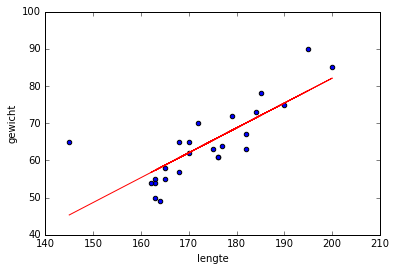

In [128]:
# opgave 1d
# y_hat geeft de voorspelling van 'gewicht'
#   voor data in df["lengte"] volgens de lin.regressie in 1c
y_hat = np.polyval([slope, intercept], df["lengte"])
plt.scatter(df.lengte, df.gewicht, marker="o")
plt.plot(df.lengte, y_hat, color="r")
plt.xlabel("lengte")
plt.ylabel("gewicht")
plt.show()

#### opgave 1e
Onder bepaalde voorwaarden kun je lineaire regressie toepassen op variabelen
van nominaal of ordinaal niveau.
In dit geval zouden we, bijvoorbeeld, *geslacht* kunnen gebruiken om *gewicht* te voorspellen.

Om lineaire regressie toe te passen op de nominale variabele *geslacht*, die nu volgens de spreadsheet de waarden 'M', 'F', 'V', 'm', 'f' en 'v' aan kan nemen, moeten we de variabele coderen naar een numerieke variabele.
Ik kies ervoor een nieuwe variabele toe te voegen, genaamd *is_female*, welke een booleanse waarde aan kan nemen. Booleans in Python laten zich eenvoudig converteren naar getallen (False=0, True=1) dus daar kunnen we mee rekenen.

In [129]:
df["is_female"] = (df["geslacht"].str.upper() != 'M').astype(np.float)

Nu kun je bijvoorbeeld de correlatie coëfficiënt en de P-value uit laten rekenen voor *is_female* en *gewicht*:

In [130]:
r, p_value = st.pearsonr(df["is_female"], df["gewicht"])
print("r = {:.4f}, P-value = {:.4f}".format(r, p_value))

r = -0.7163, P-value = 0.0001


Dat ziet er veelbelovend uit!  
Lineaire regressie voor *is_female* (verklarend, $x$) en *gewicht* (verklaarde, $y$):

In [131]:
n = df["is_female"].count()
x = np.vstack([np.ones_like(df["is_female"]), df["is_female"]])
y = df["gewicht"].values

intercept, slope = np.linalg.inv(x.dot(x.T)).dot(x.dot(y))
print("y = a + bx -> a = {:.4f}, b = {:.4f}".format(intercept, slope))

y = a + bx -> a = 71.9167, b = -14.3782


Kun je de herkomst van de waarde van *a*, de intercept, herleiden? En de waarde van $\hat{y} = a + b \cdot x$ bij $x = 1$ dus $\hat{y} \approx 57.538$?

En een scatterplot van *is_female* en *gewicht* tekenen met de regressielijn.  
Merk op dat de voorspelling van de regressielijn voor punten *tussen* 0.0 en 1.0 niet zo zinnig is: we hebben *geslacht* weliswaar numeriek gecodeerd in *is_female*, maar we kunnen deze tussenliggende waarden niet terugcoderen. Wat zou immers het geslacht zijn van iemand met *is_female* = 0.433?

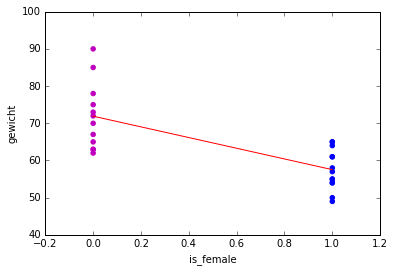

In [132]:
dot_color = ["mb"[int(val)] for val in df["is_female"]]
plt.scatter(
    df.is_female, df.gewicht,
    marker="o", color=dot_color
)
reg_line_x = np.array([df["is_female"].min(), df["is_female"].max()])
reg_line_y = intercept + slope * reg_line_x
plt.plot(reg_line_x, reg_line_y, color="r")
plt.xlabel("is_female")
plt.ylabel("gewicht")
plt.show()

Of, misschien charmanter, met *geslacht* op de horizontale as:

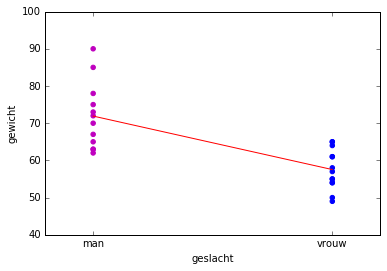

In [133]:
dot_color = ["mb"[int(val)] for val in df["is_female"]]
fig, ax = plt.subplots()
plt.scatter(
    df.is_female, df.gewicht,
    marker="o", color=dot_color
)
reg_line_x = np.array([df["is_female"].min(), df["is_female"].max()])
reg_line_y = intercept + slope * reg_line_x
plt.plot(reg_line_x, reg_line_y, color="r")
plt.xlabel("geslacht")
ax.set_xticks(reg_line_x)
ax.set_xticklabels(["man", "vrouw"])
plt.ylabel("gewicht")
plt.show()

### Opgave 2

<span>a.</span> Download de Iris dataset van Fisher (github) en construeer een pandas.DataFrame op basis van het Excel-bestand. <img src="images/stars_1.png" alt="1 star" style="display: inline; margin-top: -5px" />

<span>b.</span> Onderzoek correlatie tussen alle mogelijke (numerieke) variabelen in de Iris data. (zie ook c.)<img src="images/stars_2.png" alt="2 star" style="display: inline; margin-top: -5px" />

<span>c.</span> Kun je het onderzoeken van alle mogelijke combinaties van opgegeven variabelen (kolomnamen) ook automatiseren in Python?<img src="images/stars_2.png" alt="2 star" style="display: inline; margin-top: -5px" />

<span>d.</span> Stel vergelijkingen van regressielijnen op voor alle kolomparen waarvan je, op basis van opgave b, vermoedt dat ze correlatie vertonen. Teken ook steeds de regressielijnen in een scatterplot van de gebruikte variabelen. <img src="images/stars_2.png" alt="2 star" style="display: inline; margin-top: -5px" />

In [136]:
# opgave 2a
df = pd.read_excel("data/iris.data.xlsx")
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [137]:
# opgave 2b & 2c
cols = df.select_dtypes([np.number]).columns.values
for a, col_a in enumerate(cols):
    for b, col_b in enumerate(cols[a + 1:]):
        print("Correlation for variables '{}' and '{}':".format(col_a, col_b))
        print("  r = {:.4f}, P-value = {:.4f}".format(
                *st.pearsonr(df[col_a], df[col_b]))
        )

Correlation for variables 'sepal length' and 'sepal width':
  r = -0.1094, P-value = 0.1828
Correlation for variables 'sepal length' and 'petal length':
  r = 0.8718, P-value = 0.0000
Correlation for variables 'sepal length' and 'petal width':
  r = 0.8180, P-value = 0.0000
Correlation for variables 'sepal width' and 'petal length':
  r = -0.4205, P-value = 0.0000
Correlation for variables 'sepal width' and 'petal width':
  r = -0.3565, P-value = 0.0000
Correlation for variables 'petal length' and 'petal width':
  r = 0.9628, P-value = 0.0000


In [138]:
# opmerking over automatisering van mogelijke combinaties kolommen:
# je zou ook de module itertools kunnen gebruiken:
# itertools.combinations bepaalt alle mogelijke combinaties
# van n items uit de opgegeven list
import itertools as it

cols = df.select_dtypes([np.number]).columns.values
for sel_columns in it.combinations(cols, 2):
    print(sel_columns)

('sepal length', 'sepal width')
('sepal length', 'petal length')
('sepal length', 'petal width')
('sepal width', 'petal length')
('sepal width', 'petal width')
('petal length', 'petal width')


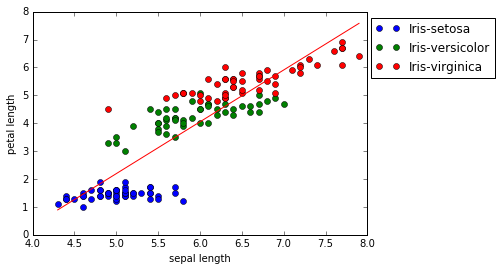

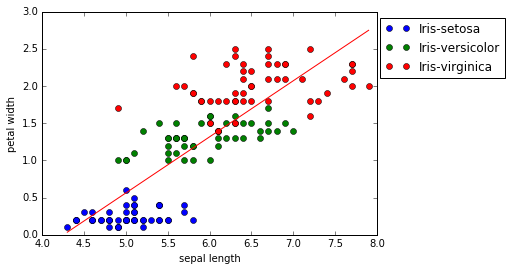

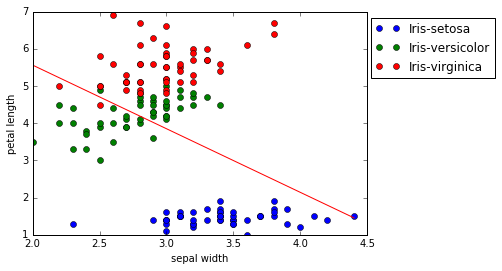

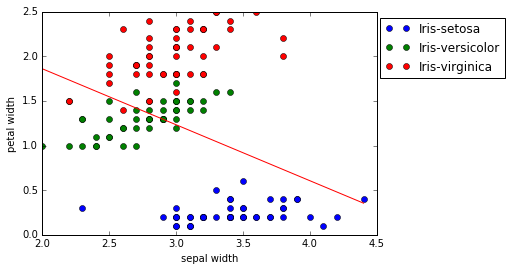

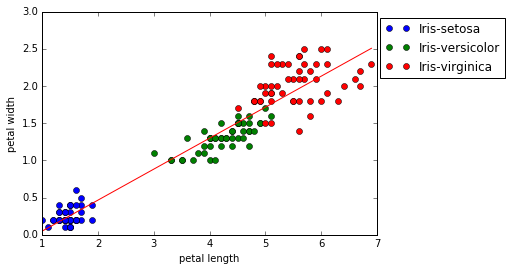

In [139]:
# opgave 2d
# kleurtjes worden gebruikt om iris-typen te tonen
col_pairs = [
    ("sepal length", "petal length"),
    ("sepal length", "petal width"),
    ("sepal width", "petal length"),
    ("sepal width", "petal width"),
    ("petal length", "petal width"),
]

for col_a, col_b in col_pairs:
    slope, intercept, r, p_value, stderr = st.linregress(df[col_a], df[col_b])
    x1, x2 = df[col_a].min(), df[col_a].max()
    y1, y2 = np.polyval([slope, intercept], [x1, x2])
    for iris_class in df["class"].unique():
        plt.plot(
            df[df["class"] == iris_class][col_a],
            df[df["class"] == iris_class][col_b],
            " o",
            label=iris_class
        )
    plt.legend(bbox_to_anchor=(1.4, 1.0))
    plt.plot([x1, x2], [y1, y2], color="r")
    plt.xlabel(col_a)
    plt.ylabel(col_b)
    plt.show()